# K-Means Clustering

K-means clustering merupakan pengelompokkan berbasisi partisi atau membagi data menjadi K kelompok berdasarkan jarak setiap kelompok terhaadap centroid (rata-rata dari titik cluster)

## Langkah-Langkah Algoritma Clustering K-Means





1.   Tentukan jumlah cluster yang akan digunakan
2.   Kemudian pilih K centroid awal secara acak tergantung jumlah k yang digunakan
3. Hitung jarak setiap data ke tiap centroid menggunakan rumus Encludian Distance

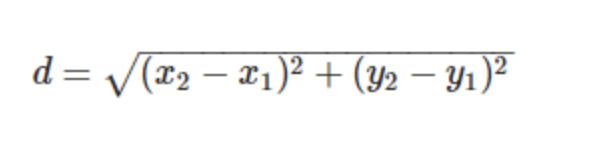

4. Kelompokkan data berdasarkan letak centroid terdekat
5. Hitung ulang centroid dari rata-rata setiap anggota clusternya
6. Lakukanlah urutan langkah-langkah hingga pada iterasi mencapai konvergen



## Menghitung Inertia



Menghitung Inertia digunakan untuk menenntukan jumlah kuadrat dari jarak titik terhadap centroidnya. Untuk menentukan nilai cluster terbaik dappat dilihat dari hasil plotting metode elbow, cluster terbaik ditentukan pada penurunan terbesar pertama dalam plotting.

Rumus mencari Inetia:

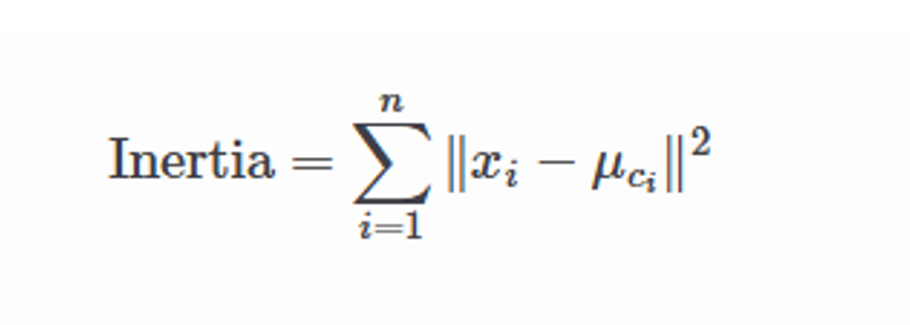

## Menghitung Silhouette Score



Menghitung Silhouette digunakan untuk menentukan kemiripan objek terhadap kluster sendiri dibandingkan cluster lainnya.

Rumus menentukan Silhouette
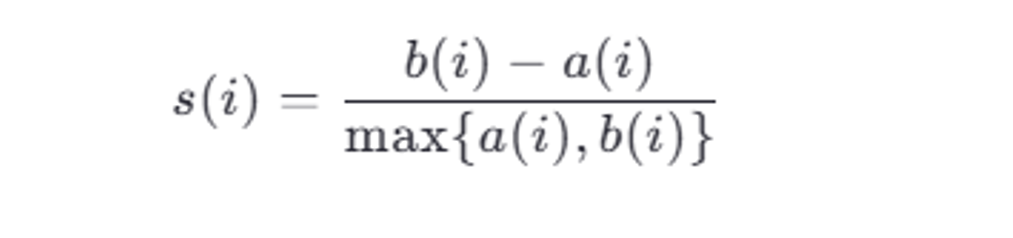


keterangan:
- b(i) : merupakan rata-rata titik ke semua titik cluster tetangga.
- a(i) : merupakan rata-rata titik ke semua titik dalam cluster yang sama.

## Install Library Pendukung

In [4]:
!pip install pymysql

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 1.6 MB/s eta 0:00:00


In [5]:
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from tabulate import tabulate
from matplotlib.patches import Patch

## Koneksi Ke Database MySQL DBeaver melalui aiven.io

In [6]:
import pymysql

# koneksi ke database mysql melalui aiven.io
DB_HOST = "mysql-131f3e28-fathanlearn-5ad0.i.aivencloud.com"
DB_PORT = 25962
DB_NAME = "defaultdb"
DB_USER = "avnadmin"
DB_PASS = "AVNS_hCKUXEhLqojSjCxujVo"

connect_2 = pymysql.connect(
    host=DB_HOST,
    port=DB_PORT,
    database=DB_NAME,
    user=DB_USER,
    password=DB_PASS,
    ssl={'ssl': {}}
)

data_mysql = connect_2.cursor()

# ambil data ke database
data_mysql.execute("SELECT * FROM iris_mysql.data_Iris LIMIT 10;")
data_db_sql = data_mysql.fetchall()


print("10 data dalam tabel data_iris")
for data2 in data_db_sql:
  print(data2)

10 data dalam tabel data_iris
(1, 5.1, 3.5, 1.4, 0.2, 'Iris-setosa')
(2, 4.9, 3.0, 1.4, 0.2, 'Iris-setosa')
(3, 4.7, 3.2, 1.3, 0.2, 'Iris-setosa')
(4, 4.6, 3.1, 1.5, 0.2, 'Iris-setosa')
(5, 5.0, 3.6, 1.4, 0.2, 'Iris-setosa')
(6, 5.4, 3.9, 1.7, 0.4, 'Iris-setosa')
(7, 4.6, 3.4, 1.4, 0.3, 'Iris-setosa')
(8, 5.0, 3.4, 1.5, 0.2, 'Iris-setosa')
(9, 4.4, 2.9, 1.4, 0.2, 'Iris-setosa')
(10, 4.9, 3.1, 1.5, 0.1, 'Iris-setosa')


## Menghapus / Menyeleksi Kolom Species dalam Database

In [7]:
data_mysql.execute("SELECT id, SepalLengthCM, SepalWidthCM, PetalLengthCM, PetalWidthCM FROM iris_mysql.data_Iris;")

print("Kolom 'Species' berhasil dihapus atau tidak ditampilkan.")

data_remove_class = data_mysql.fetchall()


# print("10 data dalam tabel data_iris yang telah dihapus kolom Species atau tidak ditampilkan")
header = [desc[0] for desc in data_mysql.description]
print(tabulate(data_remove_class, headers=header, tablefmt='pretty'))

Kolom 'Species' berhasil dihapus atau tidak ditampilkan.
+-----+---------------+--------------+---------------+--------------+
| id  | SepalLengthCM | SepalWidthCM | PetalLengthCM | PetalWidthCM |
+-----+---------------+--------------+---------------+--------------+
|  1  |      5.1      |     3.5      |      1.4      |     0.2      |
|  2  |      4.9      |     3.0      |      1.4      |     0.2      |
|  3  |      4.7      |     3.2      |      1.3      |     0.2      |
|  4  |      4.6      |     3.1      |      1.5      |     0.2      |
|  5  |      5.0      |     3.6      |      1.4      |     0.2      |
|  6  |      5.4      |     3.9      |      1.7      |     0.4      |
|  7  |      4.6      |     3.4      |      1.4      |     0.3      |
|  8  |      5.0      |     3.4      |      1.5      |     0.2      |
|  9  |      4.4      |     2.9      |      1.4      |     0.2      |
| 10  |      4.9      |     3.1      |      1.5      |     0.1      |
| 11  |      5.4      |     3.7  

## Visualisasi Persebaran Data

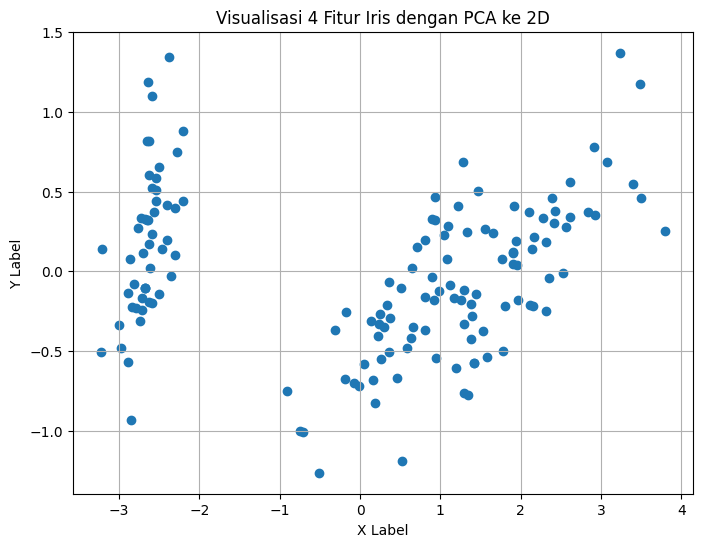

In [8]:
# data dari database diambil dan dimasukkan ke DataFrame
data = pd.DataFrame(data_remove_class, columns=["id", "SepalLengthCM", "SepalWidthCM", "PetalLengthCM", "PetalWidthCM"])

# Menghapus Kolom id
data = data.drop(columns=['id'])

# visualisasi 2 dimensi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data)

# Plot hasil PCA
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.title("Visualisasi 4 Fitur Iris dengan PCA ke 2D")
plt.xlabel("X Label")
plt.ylabel("Y Label")
plt.grid(True)
plt.show()

## Perhitungan K-Means

### Cluster 2

#### Clustering K-Means dengan Nilai K = 2

In [9]:
# mengambil data dalam database dan menghapus kolom id
values_x = np.array([row[1:] for row in data_remove_class])
k_means_C2 = KMeans(
    n_clusters=2,
    init='k-means++',
    n_init=10,
    max_iter=250,
    tol=0.0001,
    verbose=1,
    random_state=42,
    copy_x=True,
    algorithm='lloyd'
)

# latih model
k_means_C2.fit(values_x)

# ambil data,  label, dan inertia
labelC2 = k_means_C2.labels_
centroidsC2 = k_means_C2.cluster_centers_
InertiaC2 = k_means_C2.inertia_

Initialization complete
Iteration 0, inertia 193.75000000000003.
Iteration 1, inertia 152.36870647733915.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 364.48000000000013.
Iteration 1, inertia 153.40270400000003.
Iteration 2, inertia 152.51310407984596.
Iteration 3, inertia 152.36870647733915.
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 197.50999999999993.
Iteration 1, inertia 152.95128996440948.
Iteration 2, inertia 152.36870647733915.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 380.5199999999998.
Iteration 1, inertia 153.40270400000003.
Iteration 2, inertia 152.51310407984596.
Iteration 3, inertia 152.36870647733915.
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 259.6999999999999.
Iteration 1, inertia 153.59063006970555.
Iteration 2, inertia 152.36870647733915.
Converged at iteration 2: strict convergen

#### Hasil Pengelompokkan atau Clustering Data dengan K = 2

In [10]:
for i, (row, label) in enumerate(zip(data_remove_class, labelC2)):
    print(f"ID: {row[0]}, fitur: {row[1:]}, Cluster: {label}")

ID: 1, fitur: (5.1, 3.5, 1.4, 0.2), Cluster: 1
ID: 2, fitur: (4.9, 3.0, 1.4, 0.2), Cluster: 1
ID: 3, fitur: (4.7, 3.2, 1.3, 0.2), Cluster: 1
ID: 4, fitur: (4.6, 3.1, 1.5, 0.2), Cluster: 1
ID: 5, fitur: (5.0, 3.6, 1.4, 0.2), Cluster: 1
ID: 6, fitur: (5.4, 3.9, 1.7, 0.4), Cluster: 1
ID: 7, fitur: (4.6, 3.4, 1.4, 0.3), Cluster: 1
ID: 8, fitur: (5.0, 3.4, 1.5, 0.2), Cluster: 1
ID: 9, fitur: (4.4, 2.9, 1.4, 0.2), Cluster: 1
ID: 10, fitur: (4.9, 3.1, 1.5, 0.1), Cluster: 1
ID: 11, fitur: (5.4, 3.7, 1.5, 0.2), Cluster: 1
ID: 12, fitur: (4.8, 3.4, 1.6, 0.2), Cluster: 1
ID: 13, fitur: (4.8, 3.0, 1.4, 0.1), Cluster: 1
ID: 14, fitur: (4.3, 3.0, 1.1, 0.1), Cluster: 1
ID: 15, fitur: (5.8, 4.0, 1.2, 0.2), Cluster: 1
ID: 16, fitur: (5.7, 4.4, 1.5, 0.4), Cluster: 1
ID: 17, fitur: (5.4, 3.9, 1.3, 0.4), Cluster: 1
ID: 18, fitur: (5.1, 3.5, 1.4, 0.3), Cluster: 1
ID: 19, fitur: (5.7, 3.8, 1.7, 0.3), Cluster: 1
ID: 20, fitur: (5.1, 3.8, 1.5, 0.3), Cluster: 1
ID: 21, fitur: (5.4, 3.4, 1.7, 0.2), Cluster: 1
I

#### Nilai Innertia dengan K = 2

In [11]:
print(f"nilai inertia clustering sebanyak 2 yakni sebesar = {InertiaC2}")

nilai inertia clustering sebanyak 2 yakni sebesar = 152.36870647733915


#### Nilai Silhouette Score dengan Nilai K = 2

In [12]:
from sklearn.metrics import silhouette_score

Silhouette_scoreC2 = silhouette_score(values_x, labelC2)
print(f"Silhouette Score Cluster 2: {Silhouette_scoreC2:.4f}")

Silhouette Score Cluster 2: 0.6808


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


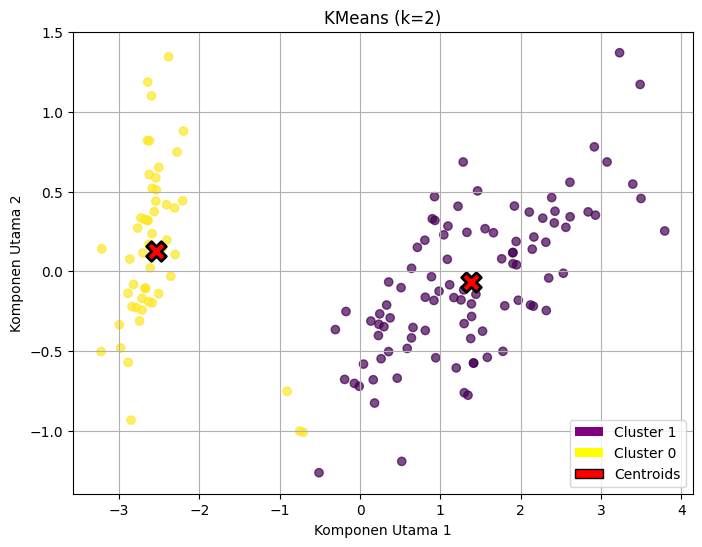

In [13]:
centroidsC2_pca = pca.transform(centroidsC2)

plt.figure(figsize=(8,6))

# a) titik data
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1],
                      c=labelC2, cmap='viridis', alpha=0.7)

# b) centroid
plt.scatter(centroidsC2_pca[:, 0], centroidsC2_pca[:, 1],
            c='red', marker='X', s=200, linewidths=2, edgecolors='k',
            label='Centroids')

# menambahkan legend untuk setiap cluster
legend_elements = [
    Patch(facecolor='purple', label='Cluster 1'),
    Patch(facecolor='yellow', label='Cluster 0'),
    Patch(facecolor='red', edgecolor='black', label='Centroids')
]

plt.title("KMeans (k=2)")
plt.xlabel("Komponen Utama 1")
plt.ylabel("Komponen Utama 2")
plt.legend(handles=legend_elements)
plt.grid(True)
plt.show()


### Cluster 3

#### Clustering K-Means dengan Nilai K = 3

In [14]:
# mengambil data dalam database dan menghapus kolom id

values_x = np.array([row[1:] for row in data_remove_class])
k_means_C3 = KMeans(
    n_clusters=3,
    init='k-means++',
    n_init=10,
    max_iter=250,
    tol=0.0001,
    verbose=1,
    random_state=42,
    copy_x=True,
    algorithm='lloyd'
)

# latih model
k_means_C3.fit(values_x)

# ambil data, label dan Inertia
labelC3 = k_means_C3.labels_
centroidsC3 = k_means_C3.cluster_centers_
InertiaC3 = k_means_C3.inertia_

Initialization complete
Iteration 0, inertia 151.65999999999997.
Iteration 1, inertia 95.27318380102044.
Iteration 2, inertia 87.00356562736205.
Iteration 3, inertia 84.80172984452899.
Iteration 4, inertia 84.10217888865147.
Iteration 5, inertia 83.13638186876975.
Iteration 6, inertia 81.83900206772624.
Iteration 7, inertia 80.89577599999998.
Iteration 8, inertia 79.96297983461304.
Iteration 9, inertia 79.43376414532673.
Iteration 10, inertia 79.01070972222224.
Iteration 11, inertia 78.94506582597728.
Converged at iteration 11: strict convergence.
Initialization complete
Iteration 0, inertia 106.30000000000007.
Iteration 1, inertia 78.94506582597728.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 137.54000000000002.
Iteration 1, inertia 87.00356562736205.
Iteration 2, inertia 84.80172984452899.
Iteration 3, inertia 84.10217888865147.
Iteration 4, inertia 83.13638186876975.
Iteration 5, inertia 81.83900206772624.
Iteration 6, inertia 80.895775

#### Hasil Pengelompokkan atau Clustering K = 3

In [15]:
for i, (row, label) in enumerate(zip(data_remove_class, labelC3)):
    print(f"ID: {row[0]}, fitur: {row[1:]}, Cluster: {label}")

ID: 1, fitur: (5.1, 3.5, 1.4, 0.2), Cluster: 1
ID: 2, fitur: (4.9, 3.0, 1.4, 0.2), Cluster: 1
ID: 3, fitur: (4.7, 3.2, 1.3, 0.2), Cluster: 1
ID: 4, fitur: (4.6, 3.1, 1.5, 0.2), Cluster: 1
ID: 5, fitur: (5.0, 3.6, 1.4, 0.2), Cluster: 1
ID: 6, fitur: (5.4, 3.9, 1.7, 0.4), Cluster: 1
ID: 7, fitur: (4.6, 3.4, 1.4, 0.3), Cluster: 1
ID: 8, fitur: (5.0, 3.4, 1.5, 0.2), Cluster: 1
ID: 9, fitur: (4.4, 2.9, 1.4, 0.2), Cluster: 1
ID: 10, fitur: (4.9, 3.1, 1.5, 0.1), Cluster: 1
ID: 11, fitur: (5.4, 3.7, 1.5, 0.2), Cluster: 1
ID: 12, fitur: (4.8, 3.4, 1.6, 0.2), Cluster: 1
ID: 13, fitur: (4.8, 3.0, 1.4, 0.1), Cluster: 1
ID: 14, fitur: (4.3, 3.0, 1.1, 0.1), Cluster: 1
ID: 15, fitur: (5.8, 4.0, 1.2, 0.2), Cluster: 1
ID: 16, fitur: (5.7, 4.4, 1.5, 0.4), Cluster: 1
ID: 17, fitur: (5.4, 3.9, 1.3, 0.4), Cluster: 1
ID: 18, fitur: (5.1, 3.5, 1.4, 0.3), Cluster: 1
ID: 19, fitur: (5.7, 3.8, 1.7, 0.3), Cluster: 1
ID: 20, fitur: (5.1, 3.8, 1.5, 0.3), Cluster: 1
ID: 21, fitur: (5.4, 3.4, 1.7, 0.2), Cluster: 1
I

#### Nilai Inertia dengan K = 3

In [16]:
print(f"nilai inertia clustering sebanyak 3 yakni sebesar = {InertiaC3}")

nilai inertia clustering sebanyak 3 yakni sebesar = 78.94084142614601


#### Nilai Silhouette dengan Nilai K = 3

In [17]:
from sklearn.metrics import silhouette_score

Silhouette_scoreC3 = silhouette_score(values_x, labelC3)
print(f"Silhouette Score Cluster 3: {Silhouette_scoreC3:.4f}")

Silhouette Score Cluster 3: 0.5526


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


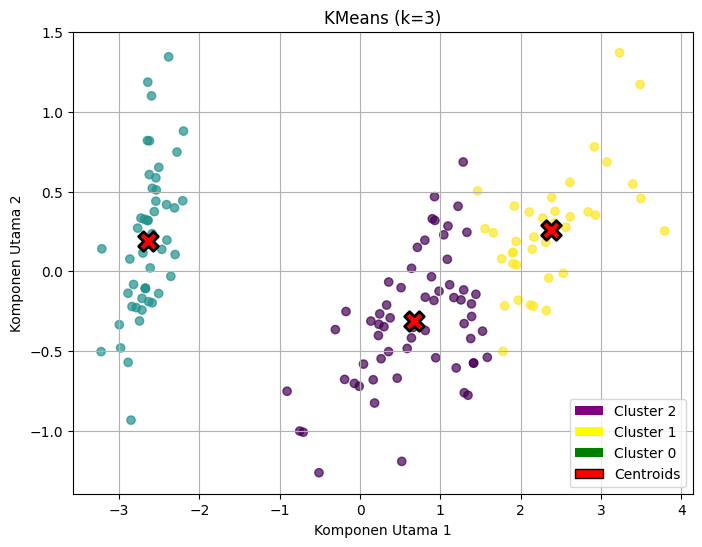

In [18]:
centroidsC3_pca = pca.transform(centroidsC3)

plt.figure(figsize=(8,6))

# a) titik data, diwarnai menurut label klaster
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1],
                      c=labelC3, cmap='viridis', alpha=0.7)

# b) centroid di ruang PCA
plt.scatter(centroidsC3_pca[:, 0], centroidsC3_pca[:, 1],
            c='red', marker='X', s=200, linewidths=2, edgecolors='k',
            label='Centroids')

# menambahkan legend untuk setiap cluster
legend_elements = [
    Patch(facecolor='purple', label='Cluster 2'),
    Patch(facecolor='yellow', label='Cluster 1'),
    Patch(facecolor='green', label='Cluster 0'),
    Patch(facecolor='red', edgecolor='black', label='Centroids')
]

plt.title("KMeans (k=3)")
plt.xlabel("Komponen Utama 1")
plt.ylabel("Komponen Utama 2")
plt.legend(handles=legend_elements)
plt.grid(True)
plt.show()

### Cluster 4

#### Clustering K-Means dengan Nilai K = 4

In [19]:
# mengambil data dalam database dan menghapus kolom id

values_x = np.array([row[1:] for row in data_remove_class])
k_means_C4 = KMeans(
    n_clusters=4,
    init='k-means++',
    n_init=10,
    max_iter=250,
    tol=0.0001,
    verbose=1,
    random_state=42,
    copy_x=True,
    algorithm='lloyd'
)

# latih model
k_means_C4.fit(values_x)

# ambil data, label dan Inertia
labelC4 = k_means_C4.labels_
centroidsC4 = k_means_C4.cluster_centers_
InertiaC4 = k_means_C4.inertia_

Initialization complete
Iteration 0, inertia 104.79999999999995.
Iteration 1, inertia 62.07328086734693.
Iteration 2, inertia 58.018738690476184.
Iteration 3, inertia 57.44028021295475.
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 93.91000000000001.
Iteration 1, inertia 63.09975821705885.
Iteration 2, inertia 58.108847546645755.
Iteration 3, inertia 57.37340990587695.
Iteration 4, inertia 57.34540931571815.
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 82.37000000000005.
Iteration 1, inertia 57.35501904761905.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 97.24000000000001.
Iteration 1, inertia 61.88403410158182.
Iteration 2, inertia 59.587131566925244.
Iteration 3, inertia 58.215718600663415.
Iteration 4, inertia 57.537356239856265.
Iteration 5, inertia 57.434856134937775.
Iteration 6, inertia 57.37445420624858.
Iteration 7, inertia 57.34540931571815.

#### Hasil Pengelompokkan atau Clustering dengan Nilai K = 4

In [20]:
for i, (row, label) in enumerate(zip(data_remove_class, labelC4)):
    print(f"ID: {row[0]}, fitur: {row[1:]}, Cluster: {label}")

ID: 1, fitur: (5.1, 3.5, 1.4, 0.2), Cluster: 1
ID: 2, fitur: (4.9, 3.0, 1.4, 0.2), Cluster: 1
ID: 3, fitur: (4.7, 3.2, 1.3, 0.2), Cluster: 1
ID: 4, fitur: (4.6, 3.1, 1.5, 0.2), Cluster: 1
ID: 5, fitur: (5.0, 3.6, 1.4, 0.2), Cluster: 1
ID: 6, fitur: (5.4, 3.9, 1.7, 0.4), Cluster: 1
ID: 7, fitur: (4.6, 3.4, 1.4, 0.3), Cluster: 1
ID: 8, fitur: (5.0, 3.4, 1.5, 0.2), Cluster: 1
ID: 9, fitur: (4.4, 2.9, 1.4, 0.2), Cluster: 1
ID: 10, fitur: (4.9, 3.1, 1.5, 0.1), Cluster: 1
ID: 11, fitur: (5.4, 3.7, 1.5, 0.2), Cluster: 1
ID: 12, fitur: (4.8, 3.4, 1.6, 0.2), Cluster: 1
ID: 13, fitur: (4.8, 3.0, 1.4, 0.1), Cluster: 1
ID: 14, fitur: (4.3, 3.0, 1.1, 0.1), Cluster: 1
ID: 15, fitur: (5.8, 4.0, 1.2, 0.2), Cluster: 1
ID: 16, fitur: (5.7, 4.4, 1.5, 0.4), Cluster: 1
ID: 17, fitur: (5.4, 3.9, 1.3, 0.4), Cluster: 1
ID: 18, fitur: (5.1, 3.5, 1.4, 0.3), Cluster: 1
ID: 19, fitur: (5.7, 3.8, 1.7, 0.3), Cluster: 1
ID: 20, fitur: (5.1, 3.8, 1.5, 0.3), Cluster: 1
ID: 21, fitur: (5.4, 3.4, 1.7, 0.2), Cluster: 1
I

#### Nilai Inertia dengan Nilai K = 4

In [21]:
print(f"nilai inertia clustering sebanyak 4 yakni sebesar = {InertiaC4}")

nilai inertia clustering sebanyak 4 yakni sebesar = 57.317873214285726


#### Nilai Silhouette dengan Nilai K = 4

In [22]:
from sklearn.metrics import silhouette_score

Silhouette_scoreC4 = silhouette_score(values_x, labelC4)
print(f"Silhouette Score Cluster 4: {Silhouette_scoreC4:.4f}")

Silhouette Score Cluster 4: 0.4978


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


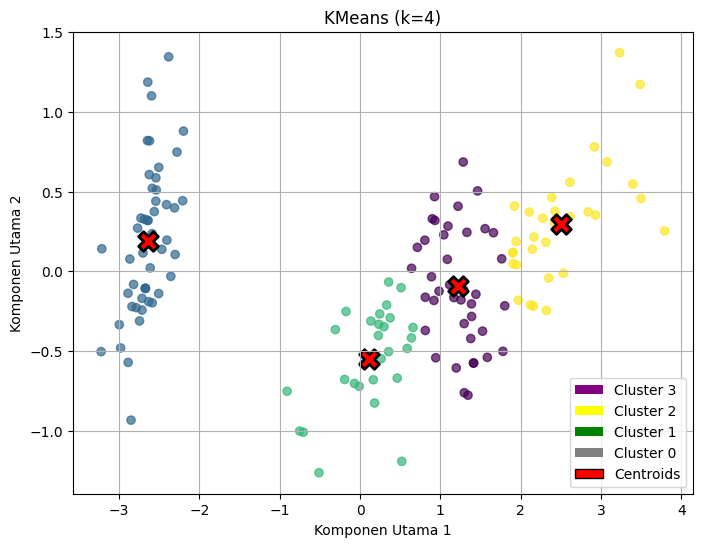

In [23]:
centroidsC4_pca = pca.transform(centroidsC4)

plt.figure(figsize=(8,6))

# a) titik data, diwarnai menurut label klaster
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1],
                      c=labelC4, cmap='viridis', alpha=0.7)

# b) centroid di ruang PCA
plt.scatter(centroidsC4_pca[:, 0], centroidsC4_pca[:, 1],
            c='red', marker='X', s=200, linewidths=2, edgecolors='k',
            label='Centroids')

# menambahkan legend untuk setiap cluster
legend_elements = [
    Patch(facecolor='purple', label='Cluster 3'),
    Patch(facecolor='yellow', label='Cluster 2'),
    Patch(facecolor='green', label='Cluster 1'),
    Patch(facecolor='gray', label='Cluster 0'),
    Patch(facecolor='red', edgecolor='black', label='Centroids')
]

plt.title("KMeans (k=4)")
plt.xlabel("Komponen Utama 1")
plt.ylabel("Komponen Utama 2")
plt.legend(handles=legend_elements)
plt.grid(True)
plt.show()

### Visualisasi Inertia Dari Ketiga Cluster Menggunakan Elbow Method

Visualisasi ini digunakan untuk menentukan cluster terbaik berdasarkan nilai innertia cluster dengan penurunan terbesar pertama

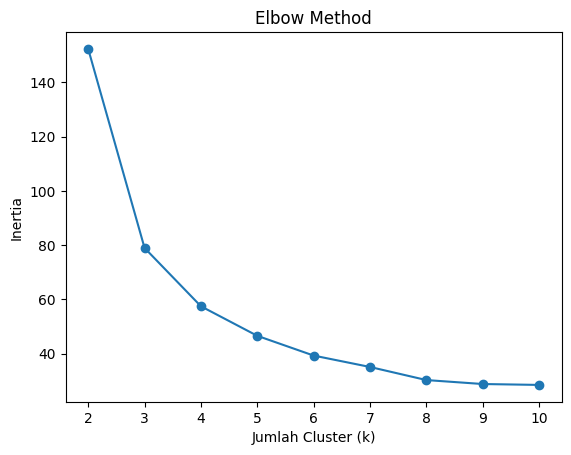

In [24]:
inertias = []
for k in range(2, 11):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(values_x)  # X = data kamu
    inertias.append(model.inertia_)

plt.plot(range(2, 11), inertias, marker='o')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

Bedasarkan visualisasi elbow di atas dapat disimpulkan bahwa kluster ke 3 merupakan kliuster terbaik sebab pada kluster tersebut memberikan penurunan terbesar pertama, setelah itu untuk nilai k selanjutnya pada grafik terlihat landai atau penurunannya tidak signifikan.

### Visualisasi Silhouette Score Berdasarkan Hasil Perhitungan Tiap Cluster

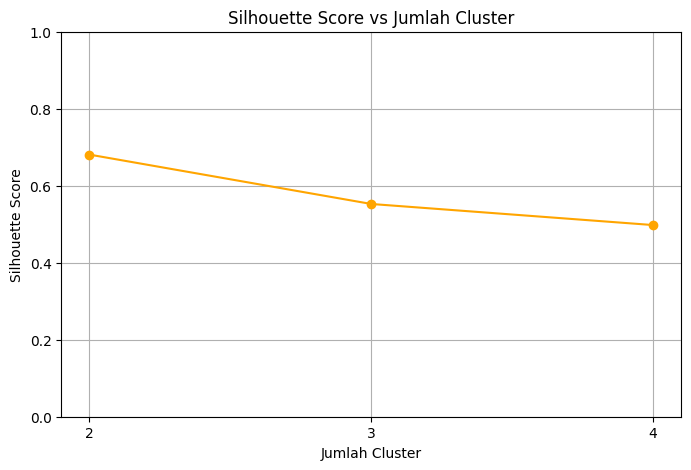

In [26]:
cluster_counts = [2, 3, 4]
silhouette_scores = []
silhouette_scores.append(Silhouette_scoreC2)
silhouette_scores.append(Silhouette_scoreC3)
silhouette_scores.append(Silhouette_scoreC4)

plt.figure(figsize=(8, 5))
plt.plot(cluster_counts, silhouette_scores, marker='o', linestyle='-', color='orange')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Jumlah Cluster')
plt.xticks(cluster_counts)
plt.ylim(0, 1)
plt.grid(True)
plt.show()


Berdasarkan visualisasi di atas dapat disimpulkan bahwa cluster silhouette score terbaik terdapat pada cluster 3, sebab scorenya paling mendekati dengan 1.